In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd


In [5]:
dataset = pd.read_csv("E:/1min_5.csv") #Read data from CSV datafile


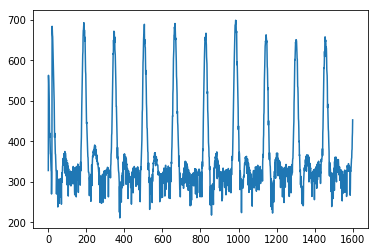

In [9]:
plt.plot(dataset.heart) #Draw the plot object
plt.show()


In [88]:
hrw = 0.75 #One-sided window size, as proportion of the sampling frequency
fs = 100 #The example dataset was recorded at 100Hz
#mov_avg = pd.rolling_mean(dataset.heart, window=(hrw*fs)) #Calculate moving average
mov_avg = dataset.heart.rolling(75).mean()


In [108]:
print(mov_avg)

[438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288569644, 438.6738288

In [89]:
#Impute where moving average function returns NaN, which is the beginning of the signal where x hrw
avg_hr = (np.mean(dataset.heart)) 
mov_avg = [avg_hr if math.isnan(x) else x for x in mov_avg]
mov_avg = [x*1.2 for x in mov_avg] #For now we raise the average by 20% to prevent the secondary heart contraction from interfering, in part 2 we will do this dynamically
dataset['heart_rollingmean'] = mov_avg #Append the moving average to the dataframe


In [111]:
#print(avg_hr)
#print(dataset)

      heart  heart_rollingmean
0       328         438.673829
1       563         438.673829
2       551         438.673829
3       522         438.673829
4       504         438.673829
5       496         438.673829
6       436         438.673829
7       410         438.673829
8       420         438.673829
9       407         438.673829
10      386         438.673829
11      369         438.673829
12      368         438.673829
13      357         438.673829
14      341         438.673829
15      328         438.673829
16      325         438.673829
17      270         438.673829
18      309         438.673829
19      328         438.673829
20      684         438.673829
21      676         438.673829
22      663         438.673829
23      658         438.673829
24      637         438.673829
25      611         438.673829
26      589         438.673829
27      563         438.673829
28      551         438.673829
29      522         438.673829
...     ...                ...
1571    

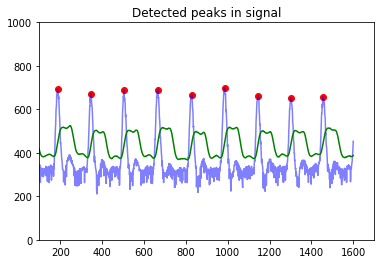

<function matplotlib.pyplot.show(*args, **kw)>

In [90]:
#Mark regions of interest
window = []
peaklist = []
listpos = 0 #We use a counter to move over the different data columns
for datapoint in dataset.heart:
    rollingmean = dataset.heart_rollingmean[listpos] #Get local mean
    
    if (datapoint < rollingmean) and (len(window) < 1): #If no detectable R-complex activity -> do nothing
        listpos += 1

    elif (datapoint > rollingmean): #If signal comes above local mean, mark ROI
        window.append(datapoint)
        listpos += 1
        
    else: #If signal drops below local mean -> determine highest point
        maximum = max(window)
        beatposition = listpos - len(window) + (window.index(max(window))) #Notate the position of the point on the X-axis
        peaklist.append(beatposition) #Add detected peak to list
        window = [] #Clear marked ROI
        listpos += 1

ybeat = [dataset.heart[x] for x in peaklist] #Get the y-value of all peaks for plotting purposes
xbeat = [dataset.heart[y] for y in peaklist]
plt.title("Detected peaks in signal")
plt.xlim(100,1700)
plt.ylim(0,1000)
plt.plot(dataset.heart, alpha=0.5, color='blue') #Plot semi-transparent HR
plt.plot(mov_avg, color ='green') #Plot moving average
plt.scatter(peaklist, ybeat, color='red') #Plot detected peaks
plt.show()
plt.show


In [112]:
print(xbeat)

[563, 684, 693, 672, 689, 691, 667, 699, 663, 651, 658]


In [113]:
#print(ybeat)

[563, 684, 693, 672, 689, 691, 667, 699, 663, 651, 658]


In [114]:
print(window)

[410, 422, 453]


In [115]:
print(maximum)

658


In [91]:
RR_list = []
cnt = 0
while (cnt < (len(peaklist)-1)):
    RR_interval = (peaklist[cnt+1] - peaklist[cnt]) #Calculate distance between beats in # of samples
    ms_dist = ((RR_interval / fs) * 1000.0) #Convert sample distances to ms distances
    RR_list.append(ms_dist) #Append to list
    cnt += 1

bpm = 60000 / np.mean(RR_list) #60000 ms (1 minute) / average R-R interval of signal
print("Average Heart Beat is: %.01f" %bpm) #Round off to 1 decimal and print

Average Heart Beat is: 41.3


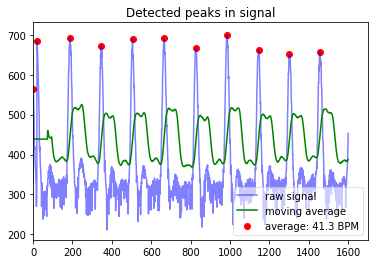

In [92]:
plt.title("Detected peaks in signal")
plt.xlim(0,1700)
plt.plot(dataset.heart, alpha=0.5, color='blue', label="raw signal") #Plot semi-transparent HR
plt.plot(mov_avg, color ='green', label="moving average") #Plot moving average
plt.scatter(peaklist, ybeat, color='red', label="average: %.1f BPM" %bpm) #Plot detected peaks
plt.legend(loc=4, framealpha=0.6)
plt.show()

In [2]:
print(bpm)
print(RR_interval)
#print(ms_dist)
print(RR_list)
#print(beatposition)

NameError: name 'bpm' is not defined

In [107]:
print(peaklist)


[1, 20, 187, 345, 505, 666, 829, 985, 1145, 1302, 1455]
